In [50]:
pip install pandas matplotlib adjustText numpy

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from adjustText import adjust_text
import numpy as np
from matplotlib.lines import Line2D

In [52]:
functional_mapping = {
    "Würde mich sehr freuen": 4,
    "Setze ich voraus": 2,
    "Ist mir egal": -1,
    "Nehme ich gerade noch hin": -1,
    "Würde mich stören": -2
}

dysfunctional_mapping = {
    "Würde mich sehr freuen": -2,
    "Setze ich voraus": -1,
    "Ist mir egal": 0,
    "Nehme ich gerade noch hin": 2,
    "Würde mich stören": 4
}

dhbw_red = '#E2001A'
dhbw_gray = '#5A5A5A'

color_map = {
    "In-Flight Entertainment": "#1f77b4",
    "Kabinendämmung": "#ff7f0e",
    "WLAN": "#2ca02c",
    "Sitzverstellung": "#d62728",
    "Tail-View Kamera": "#9467bd",
    "Fensterdimmung": "#8c564b",
    "Warme Mahlzeiten": "#e377c2",
    "Steckdose/USB-Port": "#7f7f7f",
    "Stimmungslicht": "#bcbd22",
    "Digitales Bestellsystem": "#17becf"
}

feature_titles = [
    "In-Flight Entertainment",
    "Kabinendämmung",
    "WLAN",
    "Sitzverstellung",
    "Tail-View Kamera",
    "Fensterdimmung",
    "Warme Mahlzeiten",
    "Steckdose/USB-Port",
    "Stimmungslicht",
    "Digitales Bestellsystem"
]

first_plot_titel = "Kano-Modell: Einordnunge der Features"
second_plot_titel = "Kano-Modell: Heterogenität der Antworten"
second_plot_scale_factor = 80

In [53]:
class FeatureObject:
    def __init__(self, title, question_string):
        self.title = title
        self.question_string = question_string
        self.functional_score = 0.0
        self.dysfunctional_score = 0.0
        self.functional_std = 0.0
        self.dysfunctional_std = 0.0
        self.importance_score = 0.0
        
    def __repr__(self):
        return f"[{self.title}] Func: {self.functional_score:.2f} (±{self.functional_std:.2f}) | Dysfunc: {self.dysfunctional_score:.2f} (±{self.dysfunctional_std:.2f}) | Importance: {self.importance_score:.2f}"

In [54]:
def create_dhbw_pie(data_series, title):
    """Erstellt ein Tortendiagramm mit einem Titel, der exakt über dem Kuchen zentriert ist."""
    counts = data_series.value_counts()
    colors = ['#E2001A', '#5A5A5A', '#808080', '#A9A9A9', '#C0C0C0']
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    wedges, texts, autotexts = ax.pie(
        counts, 
        radius=0.8,
        autopct='%1.1f%%', 
        colors=colors[:len(counts)],
        startangle=140,
        pctdistance=0.7,
        explode=[0.05] * len(counts),
        wedgeprops={'linewidth': 1.2, 'edgecolor': 'white'}
    )
    
    plt.setp(autotexts, size=9, weight="bold", color="white")
    
    ax.set_title(title, fontsize=14, fontweight='bold', pad=30)
    
    ax.legend(
        wedges, 
        counts.index,
        title="Kategorien",
        loc="center left",
        bbox_to_anchor=(1.1, 0.5),
        frameon=False,
        fontsize=10
    )

    plt.subplots_adjust(left=0.1, right=0.7, top=0.85, bottom=0.1)
    plt.show()

In [55]:
df = pd.read_csv("Umfrage_UX_Fluzeug.csv")

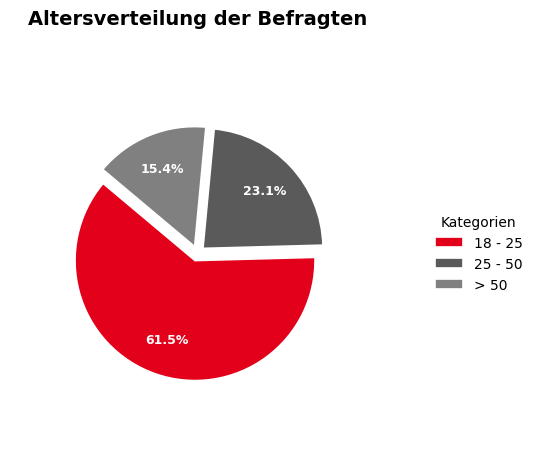

In [56]:
create_dhbw_pie(df["Wie alt sind Sie?"], "Altersverteilung der Befragten")

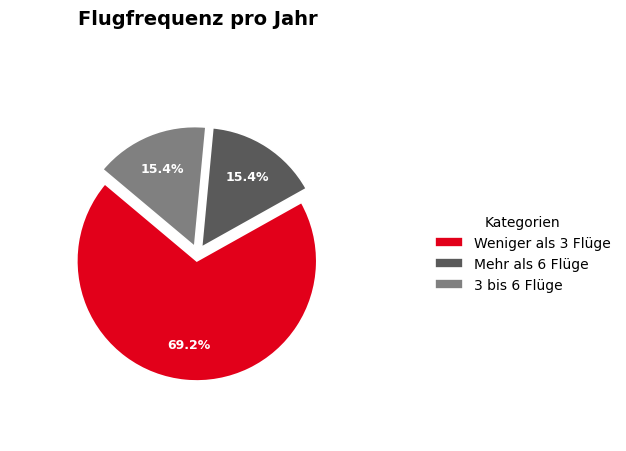

In [57]:
create_dhbw_pie(df["Wie häufg fliegen Sie im Jahr?"], "Flugfrequenz pro Jahr")

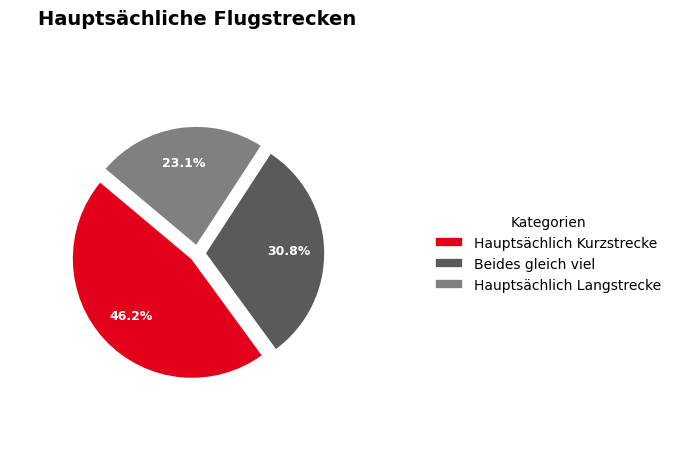

In [58]:
create_dhbw_pie(df["Fliegen Sie hauptsächlich Kurz- oder Langstrecke?"], "Hauptsächliche Flugstrecken")

In [62]:
features = []

col_index = 4

for title in feature_titles:
    func_col = df.columns[col_index]
    dysfunc_col = df.columns[col_index + 1]
    imp_col = df.columns[col_index + 2]
    
    feat = FeatureObject(title=title, question_string=func_col)
    
    func_series = df[func_col].map(functional_mapping)
    dysfunc_series = df[dysfunc_col].map(dysfunctional_mapping)
    
    feat.functional_score = func_series.mean()
    feat.dysfunctional_score = dysfunc_series.mean()
    
    feat.functional_std = func_series.std()
    feat.dysfunctional_std = dysfunc_series.std()
    
    feat.importance_score = df[imp_col].astype(float).mean()
    
    features.append(feat)
    
    col_index += 3

for f in features:
    print(f)

[In-Flight Entertainment] Func: 3.23 (±1.88) | Dysfunc: 1.08 (±1.75) | Importance: 5.31
[Kabinendämmung] Func: 3.46 (±1.45) | Dysfunc: 2.77 (±1.54) | Importance: 6.69
[WLAN] Func: 2.54 (±2.15) | Dysfunc: 1.54 (±1.66) | Importance: 5.15
[Sitzverstellung] Func: 2.62 (±1.71) | Dysfunc: 2.77 (±2.09) | Importance: 7.62
[Tail-View Kamera] Func: 1.23 (±2.68) | Dysfunc: 0.00 (±0.82) | Importance: 2.23
[Fensterdimmung] Func: 2.23 (±2.05) | Dysfunc: 1.31 (±1.80) | Importance: 5.31
[Warme Mahlzeiten] Func: 2.54 (±2.15) | Dysfunc: 1.31 (±1.80) | Importance: 5.77
[Steckdose/USB-Port] Func: 2.46 (±1.81) | Dysfunc: 2.46 (±1.66) | Importance: 6.54
[Stimmungslicht] Func: 0.15 (±2.19) | Dysfunc: 0.15 (±0.55) | Importance: 3.31
[Digitales Bestellsystem] Func: 2.46 (±2.40) | Dysfunc: 0.46 (±0.88) | Importance: 3.77


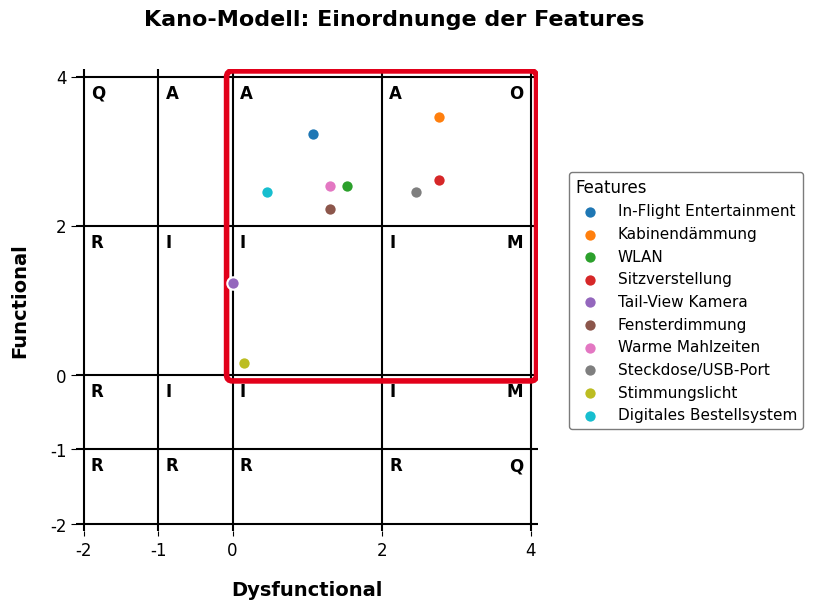

In [63]:
x_werte = [f.dysfunctional_score for f in features]
y_werte = [f.functional_score for f in features]
titel = [f.title for f in features]
farben = [color_map.get(t, "#000000") for t in titel]


fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal', adjustable='box')

fig.suptitle(first_plot_titel, fontsize=16, fontweight='bold', ha='center')

ticks = [-2, -1, 0, 2, 4]

ax.set_xlim(-2.1, 4.1)
ax.set_ylim(-2.1, 4.1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(ticks, fontsize=12)
ax.set_yticklabels(ticks, fontsize=12)

ax.set_xlabel('Dysfunctional', fontsize=14, fontweight='bold', labelpad=15)
ax.set_ylabel('Functional', fontsize=14, fontweight='bold', labelpad=15)

for spine in ax.spines.values():
    spine.set_visible(False)

for t in ticks:
    ax.axvline(t, color='black', linewidth=1.5, zorder=1)
    ax.axhline(t, color='black', linewidth=1.5, zorder=1)

for i in range(len(features)):
    ax.scatter(x_werte[i], y_werte[i], color=farben[i], s=80, edgecolor='white', linewidths=1.5, zorder=3, label=titel[i])

pad = 0.08
markierung = patches.FancyBboxPatch(
    (0, 0), 4, 4, boxstyle=f"round,pad={pad}", linewidth=4, edgecolor='#E2001A', facecolor='none', zorder=2
)
ax.add_patch(markierung)

kano_letters = [
    (-2, 4, 'Q'), (-1, 4, 'A'), (0, 4, 'A'), (2, 4, 'A'),
    (-2, 2, 'R'), (-1, 2, 'I'), (0, 2, 'I'), (2, 2, 'I'),
    (-2, 0, 'R'), (-1, 0, 'I'), (0, 0, 'I'), (2, 0, 'I'),
    (-2, -1, 'R'), (-1, -1, 'R'), (0, -1, 'R'), (2, -1, 'R')
]

for x, y, letter in kano_letters:
    ax.text(x + 0.1, y - 0.1, letter, ha='left', va='top', fontsize=12, fontweight='bold', color='black', zorder=2)

ax.text(4 - 0.1, 4 - 0.1, 'O', ha='right', va='top', fontsize=12, fontweight='bold', color='black', zorder=2)
ax.text(4 - 0.1, 2 - 0.1, 'M', ha='right', va='top', fontsize=12, fontweight='bold', color='black', zorder=2)
ax.text(4 - 0.1, 0 - 0.1, 'M', ha='right', va='top', fontsize=12, fontweight='bold', color='black', zorder=2)
ax.text(4 - 0.1, -1 - 0.1, 'Q', ha='right', va='top', fontsize=12, fontweight='bold', color='black', zorder=2)

ax.legend(
    loc='center left', 
    bbox_to_anchor=(1.05, 0.5), 
    frameon=True, 
    edgecolor='#5A5A5A', 
    fontsize=11, 
    title="Features", 
    title_fontsize=12,
    alignment='left'
)

fig.subplots_adjust(right=0.70, top=0.88)

plt.savefig('filename_2.png', format='png', dpi=600, transparent=True)

plt.show()

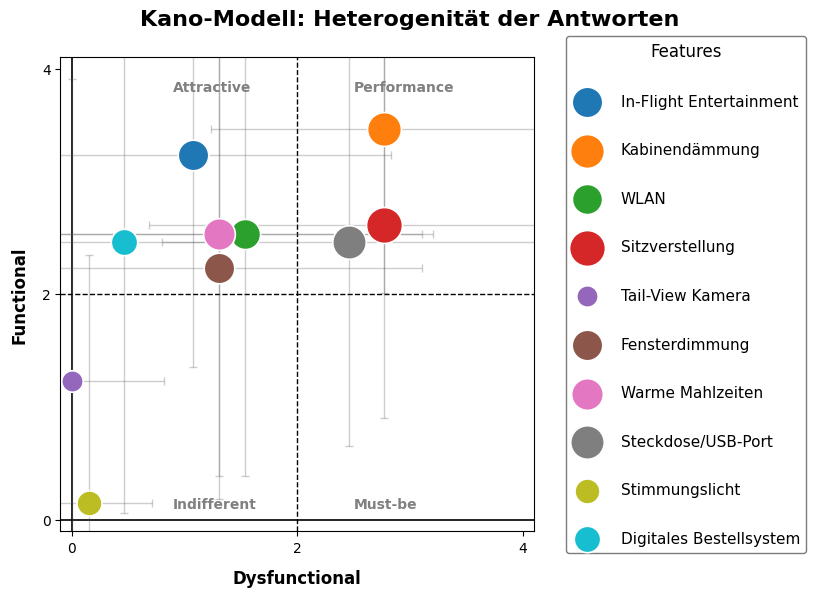

In [64]:
x_werte = [f.dysfunctional_score for f in features]
y_werte = [f.functional_score for f in features]
x_std = [f.dysfunctional_std for f in features]
y_std = [f.functional_std for f in features]
sizes = [(f.importance_score * second_plot_scale_factor) + 60 for f in features]
titel = [f.title for f in features]
farben = [color_map.get(t, "#000000") for t in titel]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_aspect('equal', adjustable='box')

fig.suptitle(second_plot_titel, fontsize=16, fontweight='bold', ha='center')

# Achsen-Limits
ax.set_xlim(-0.1, 4.1)
ax.set_ylim(-0.1, 4.1)
ticks = [0, 2, 4]
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xlabel('Dysfunctional', fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel('Functional', fontsize=12, fontweight='bold', labelpad=10)

ax.axvline(2, color='black', linestyle='--', linewidth=1, alpha=1.0, zorder=1)
ax.axhline(2, color='black', linestyle='--', linewidth=1, alpha=1.0, zorder=1)

ax.axvline(0, color='black', linewidth=1.2, zorder=1)
ax.axhline(0, color='black', linewidth=1.2, zorder=1)

ax.text(0.9, 3.8, 'Attractive', color='gray', alpha=1.0, fontsize=10, fontweight='bold')
ax.text(2.5, 3.8, 'Performance', color='gray', alpha=1.0, fontsize=10, fontweight='bold')
ax.text(0.9, 0.1, 'Indifferent', color='gray', alpha=1.0, fontsize=10, fontweight='bold')
ax.text(2.5, 0.1, 'Must-be', color='gray', alpha=1.0, fontsize=10, fontweight='bold')

for i in range(len(features)):
    ax.errorbar(
        x_werte[i], y_werte[i],
        xerr=x_std[i], yerr=y_std[i],
        fmt='none', ecolor='#5A5A5A', elinewidth=1, capsize=3,
        alpha=0.3, zorder=2, clip_on=True
    )

    ax.scatter(
        x_werte[i], y_werte[i],
        color=farben[i],
        s=sizes[i],
        edgecolor='white',
        linewidths=1.2,
        zorder=3,
        label=titel[i]
    )

ax.legend(
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    frameon=True,
    edgecolor='#5A5A5A',
    fontsize=11,
    title="Features",
    title_fontsize=12,
    labelspacing=2.2,
    handletextpad=1.2
)

fig.subplots_adjust(right=0.65, top=0.90)

plt.savefig('filename.png', format='png', dpi=600, transparent=True)

plt.show()